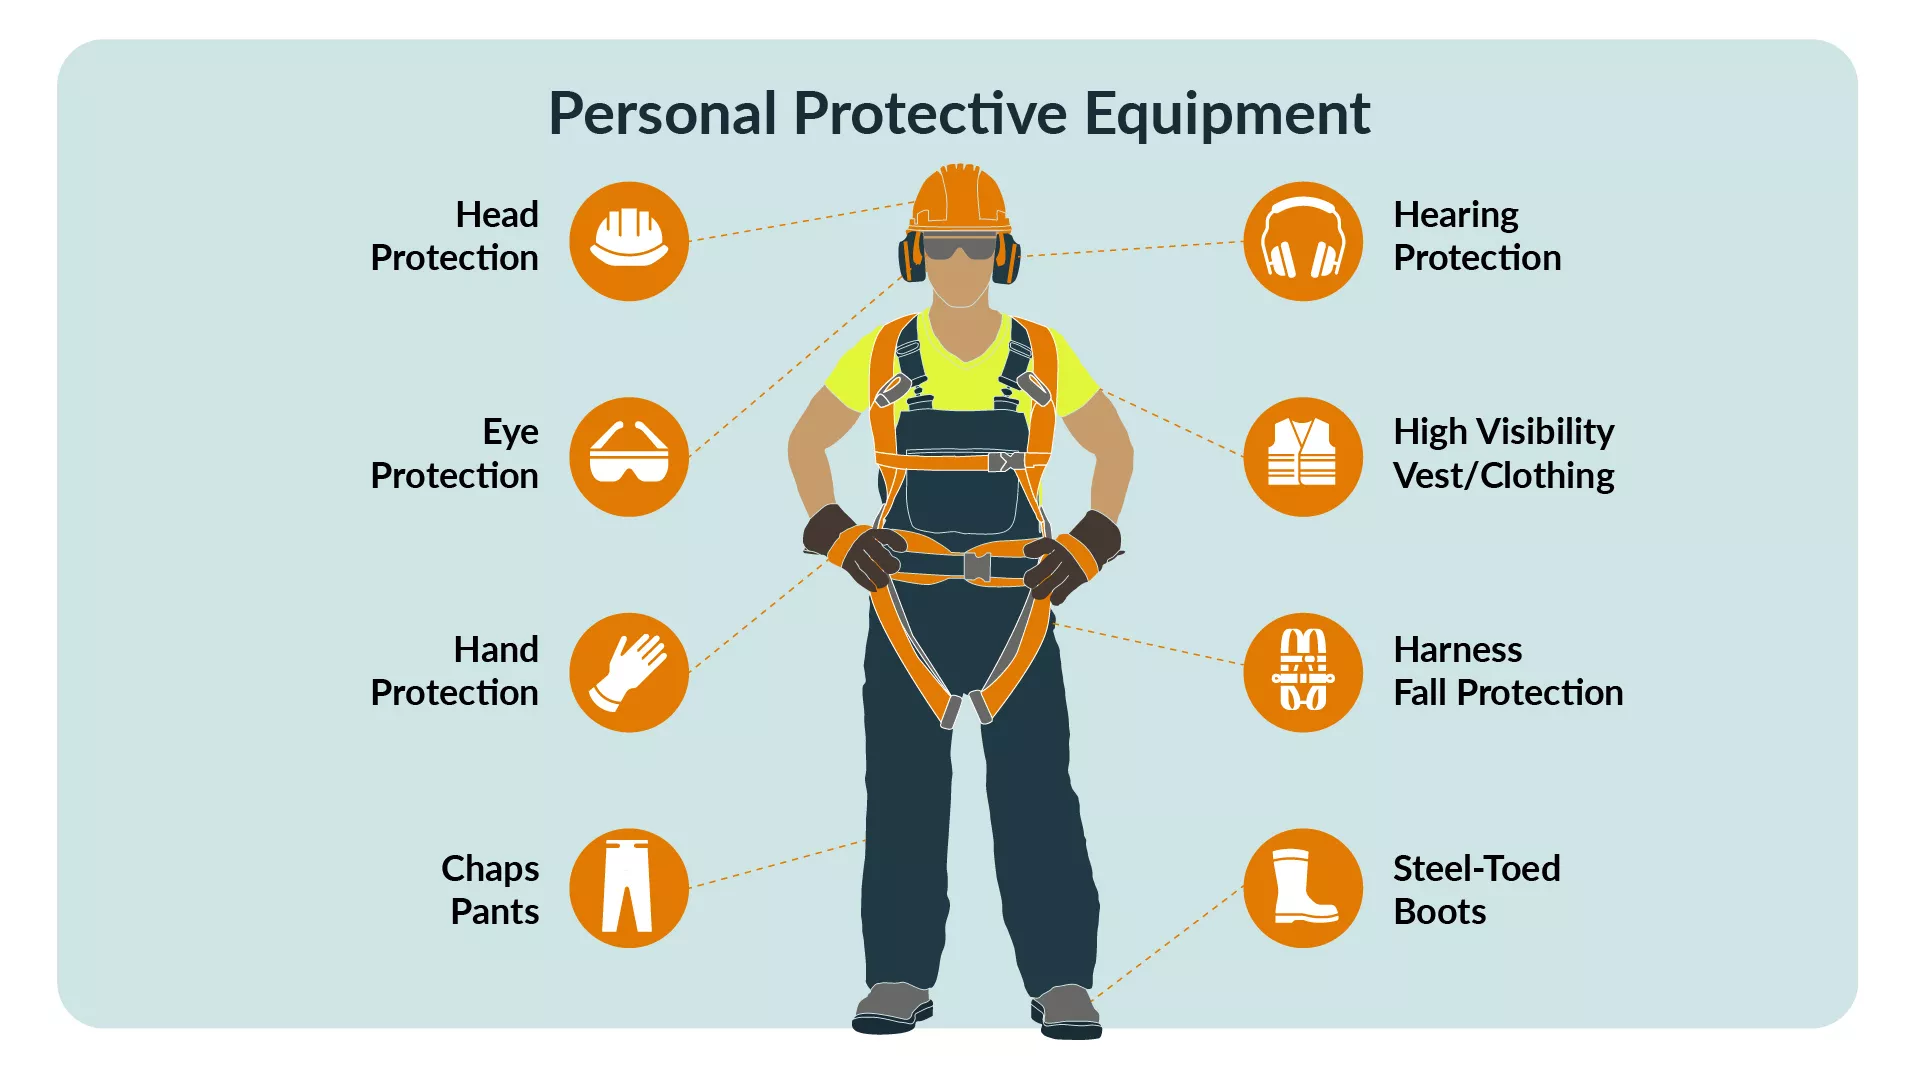

#Personal Protective Equipment Detection using YOLOv11

This notebook demonstrates how to detect Personal Protective Equipment (PPE) such as ['Boots', 'Ear-protection', 'Glass', 'Glove', 'Helmet', 'Mask', 'Person', 'Vest'] using the YOLOv11 object detection model.

#Step 1: Install Required Packages
We begin by installing the Ultralytics YOLOv11 library.

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


#Run Environment Checks
We verify if the YOLO library and dependencies are properly installed

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


#Step 2: Import Required Modules for YOLOv11 and Visualization
We import the YOLOv11 model class from the Ultralytics library.

In [7]:
from ultralytics import YOLO
from IPython.display import Image

#Step 3: Download PPE Dataset from Roboflow
In this step, we use the Roboflow Python API to download a custom PPE (Personal Protective Equipment) dataset that has been pre-annotated for object detection.

The following tasks are performed:

Install the Roboflow Python client
Authenticate using your Roboflow API key
Access a specific project and version hosted under the workspace badminton-szmsf
Download the dataset in the YOLOv11 format for training
Once downloaded, the dataset is extracted and ready to be used with YOLOv11 training.

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5JWm6s4ZhCqhYHpA7zYR")
project = rf.workspace("badminton-szmsf").project("safety-pyazl-6lzii")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 127.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to safety-1 in yolov11:: 100%|██████████| 1212/1212 [00:00<00:00, 7494.67it/s]


In [2]:
dataset.location

'/content/safety-1'

change the paths of image folder in .yaml file
#Step 4: Model Training.

In [8]:
!yolo task = detect mode = train data = {dataset.location}/data.yaml
model = "yolo11n.pt"
epochs = 100
imgsz = 640

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

#Step 5: Model Evaluation.


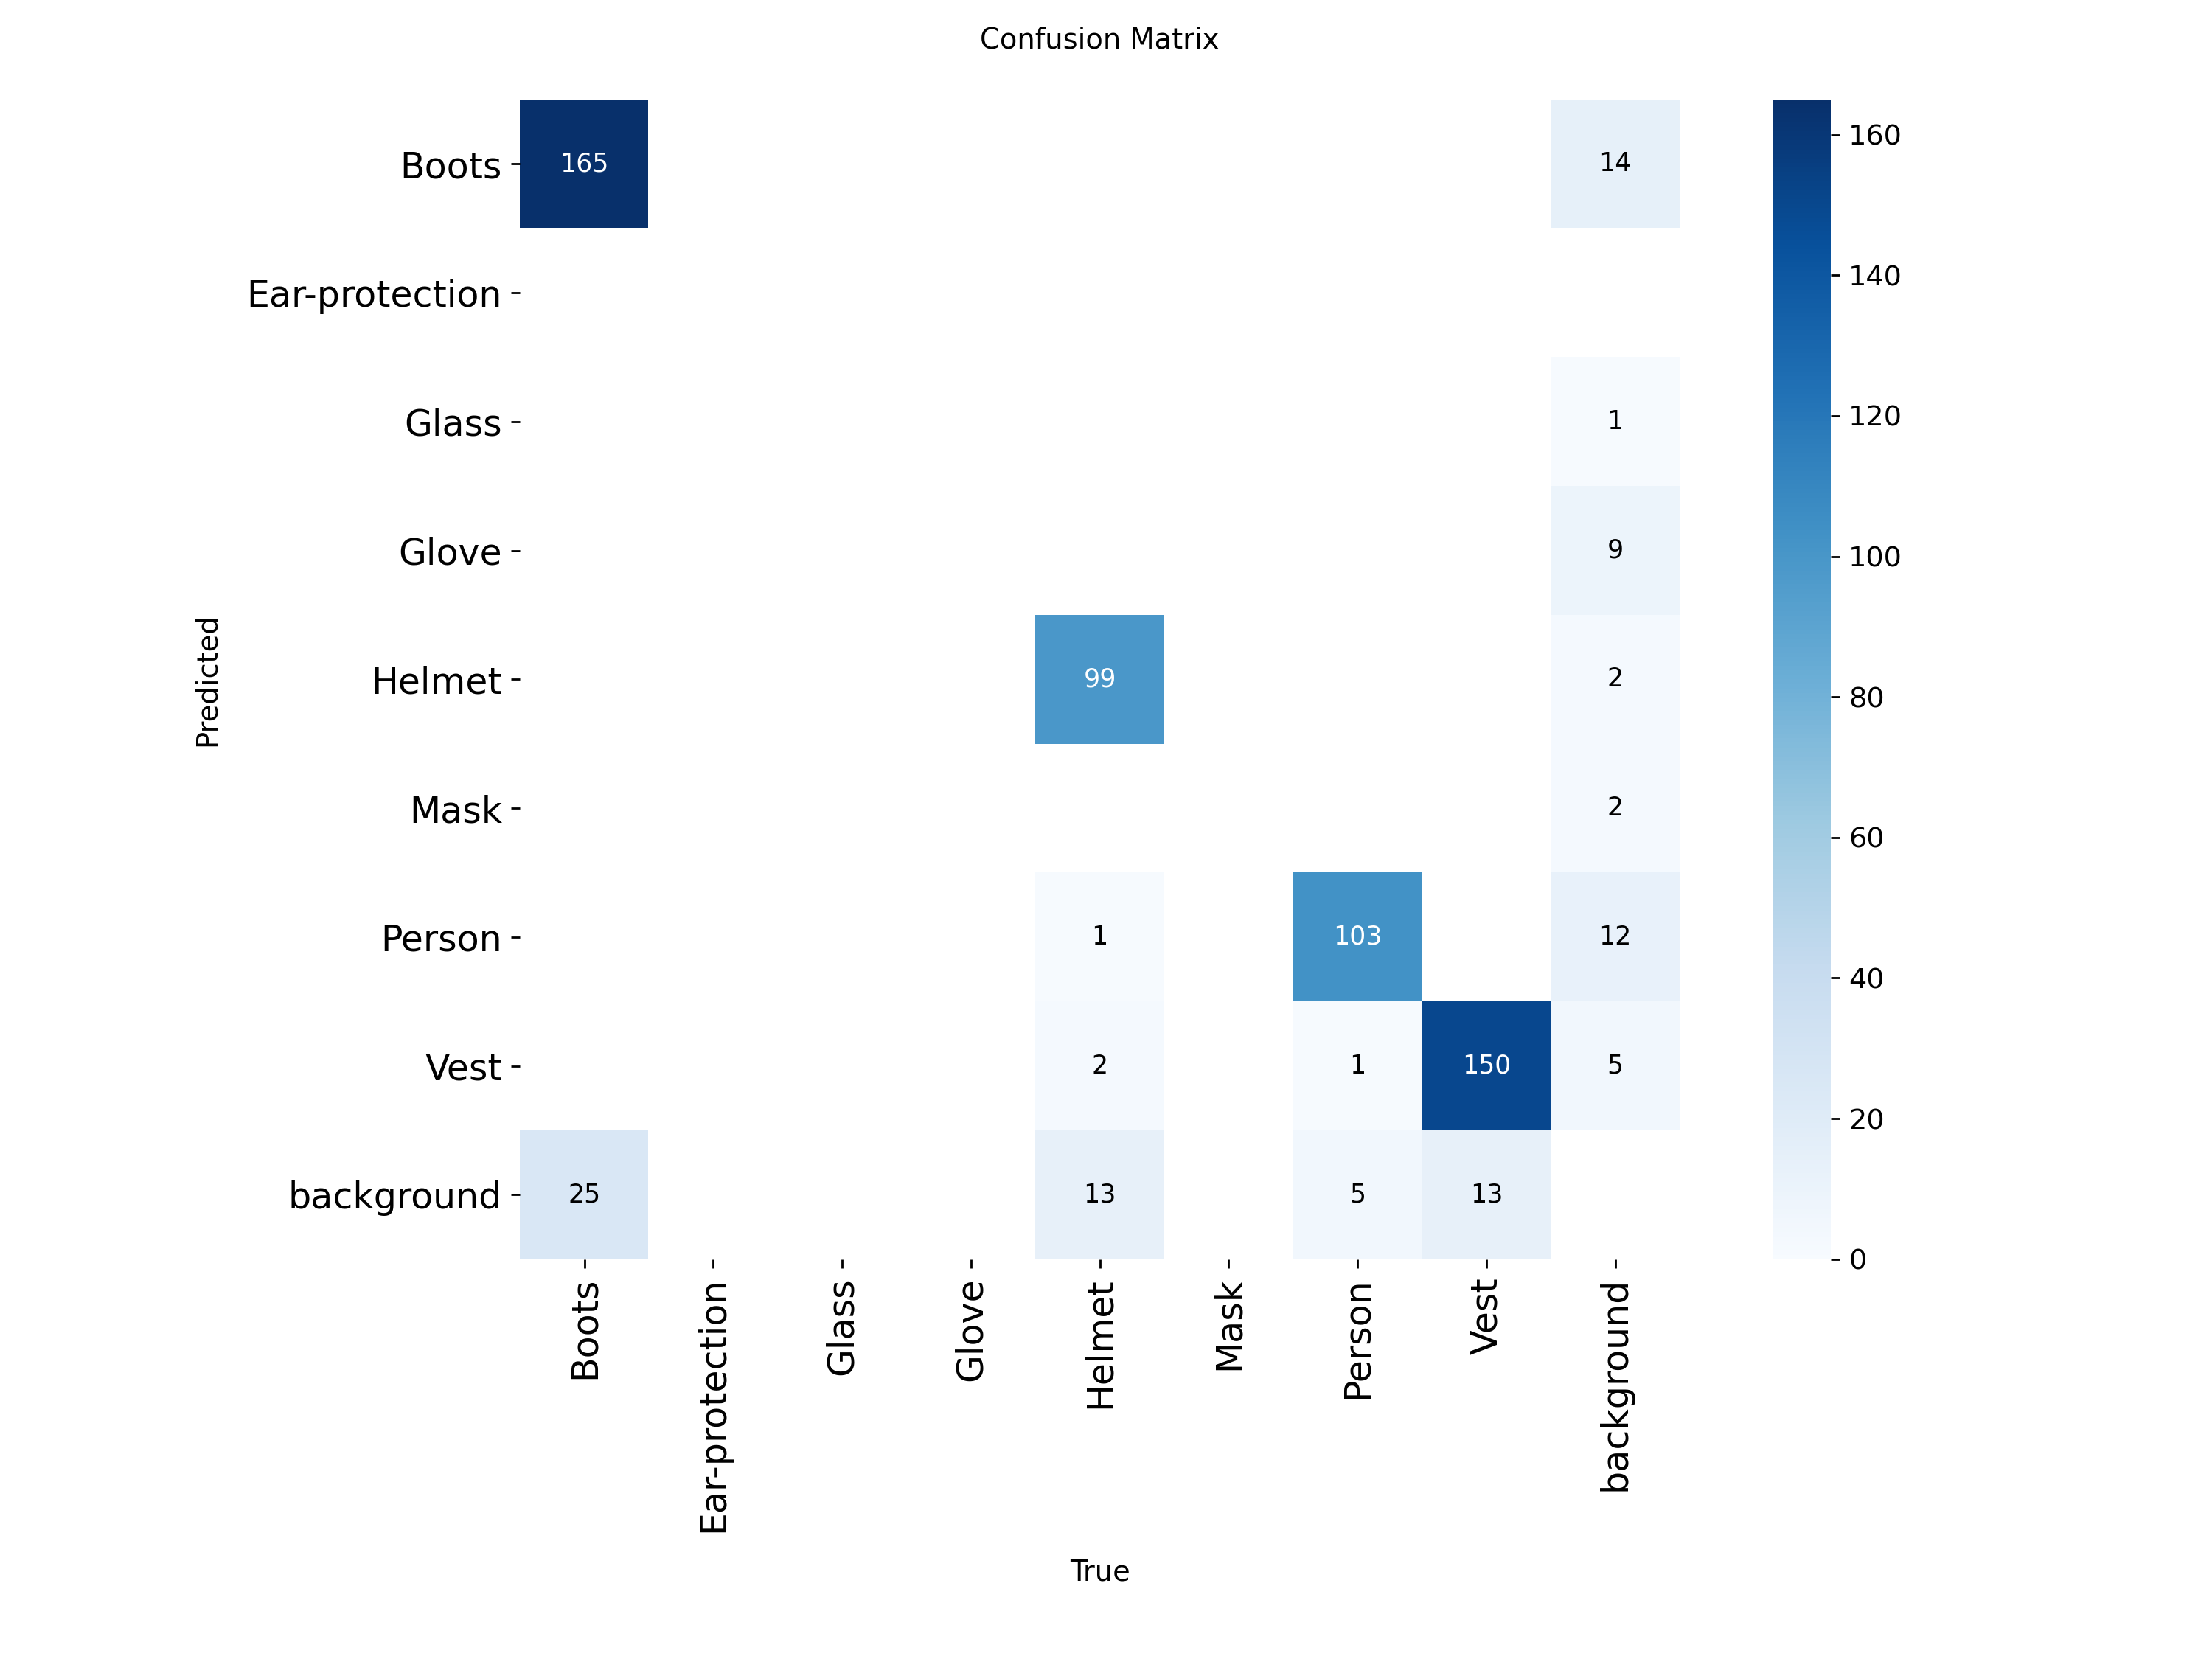

In [10]:
Image(r"/content/runs/detect/train/confusion_matrix.png",width = 800)

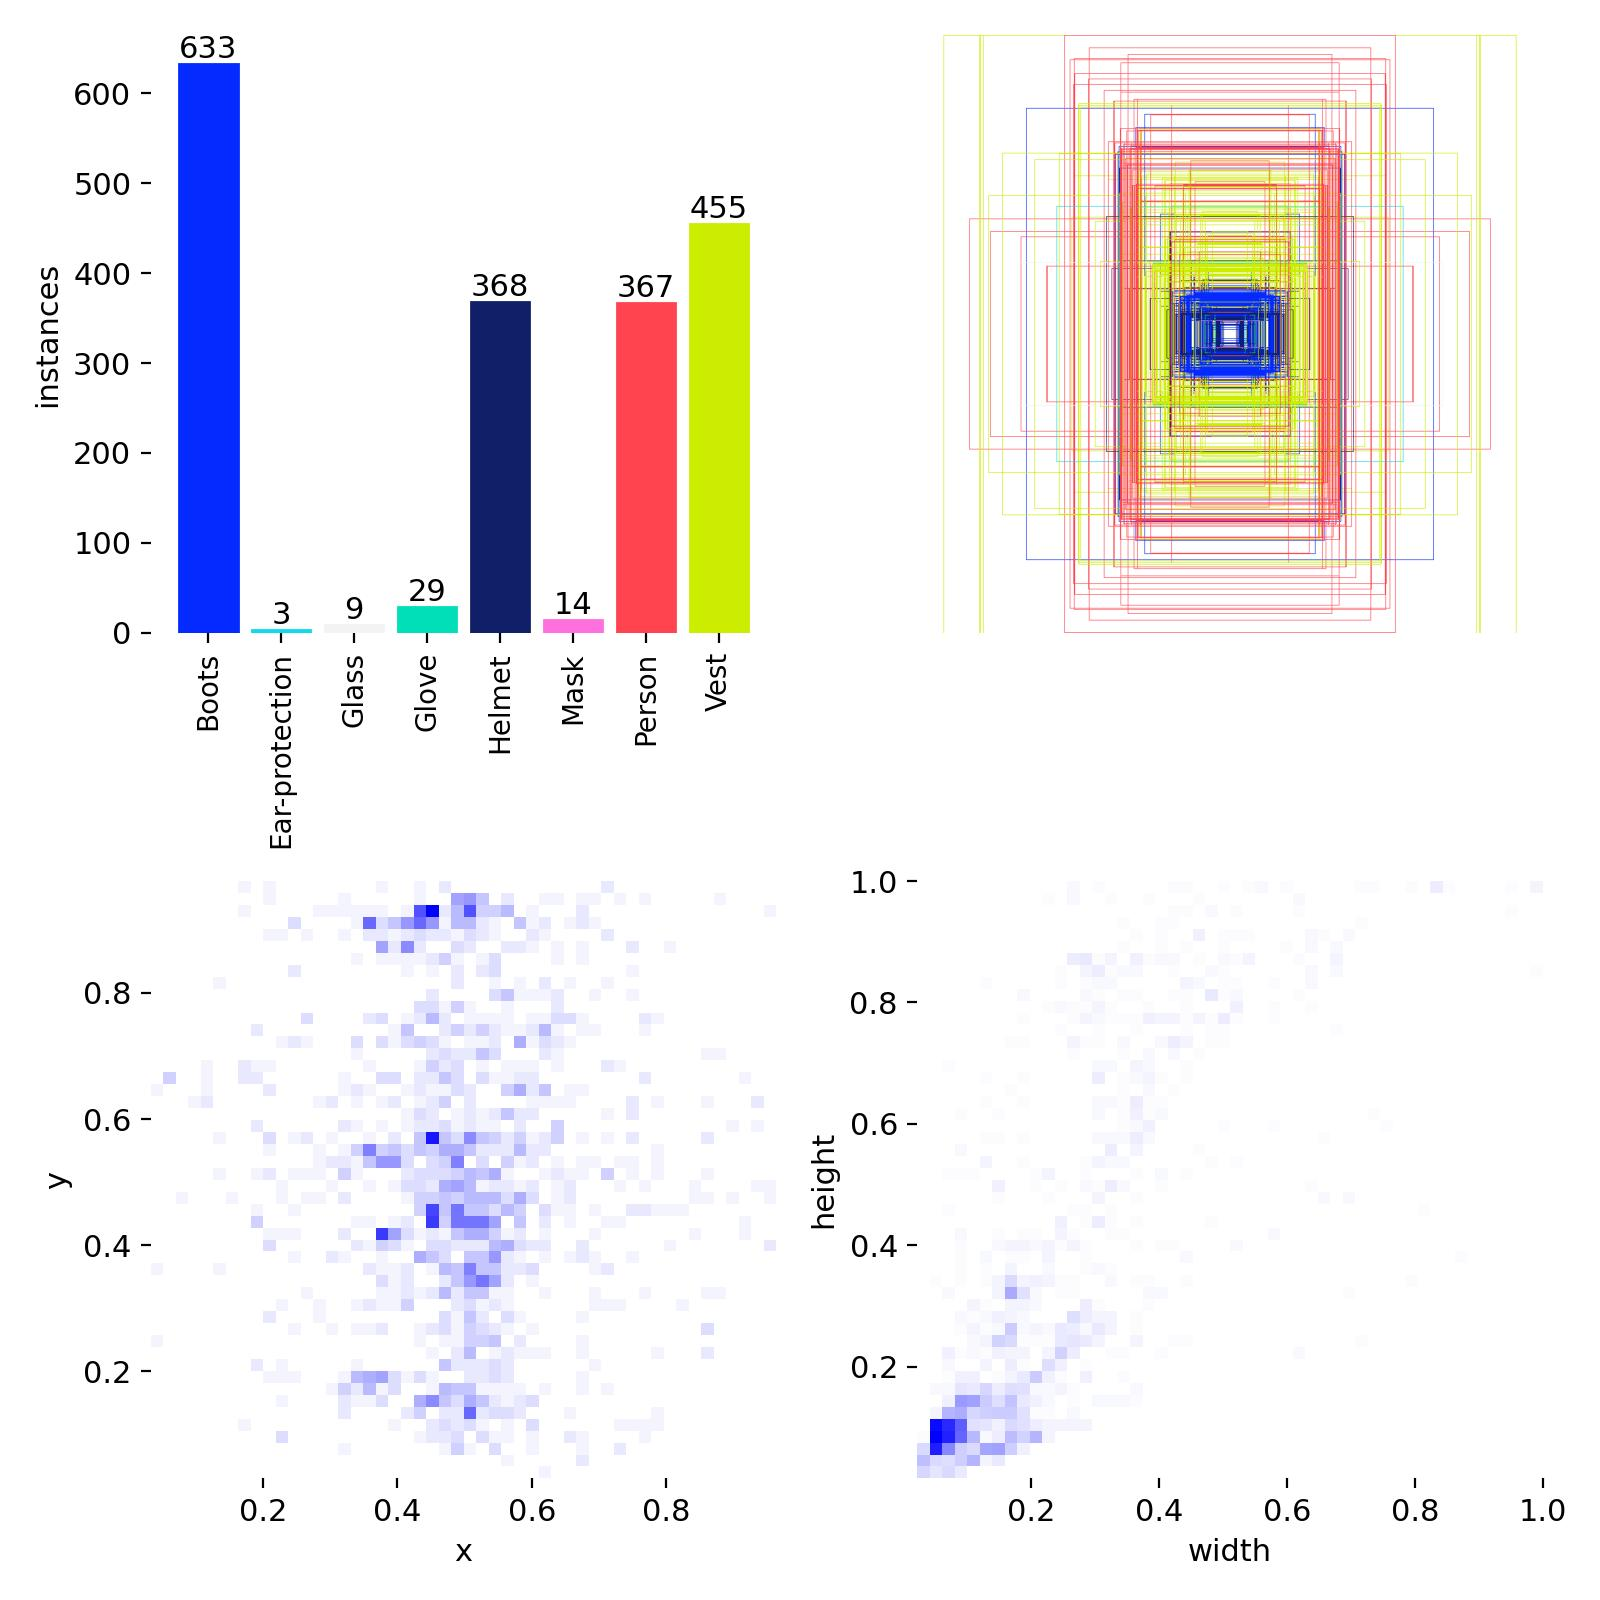

In [12]:
Image(r"/content/runs/detect/train/labels.jpg",width = 600)

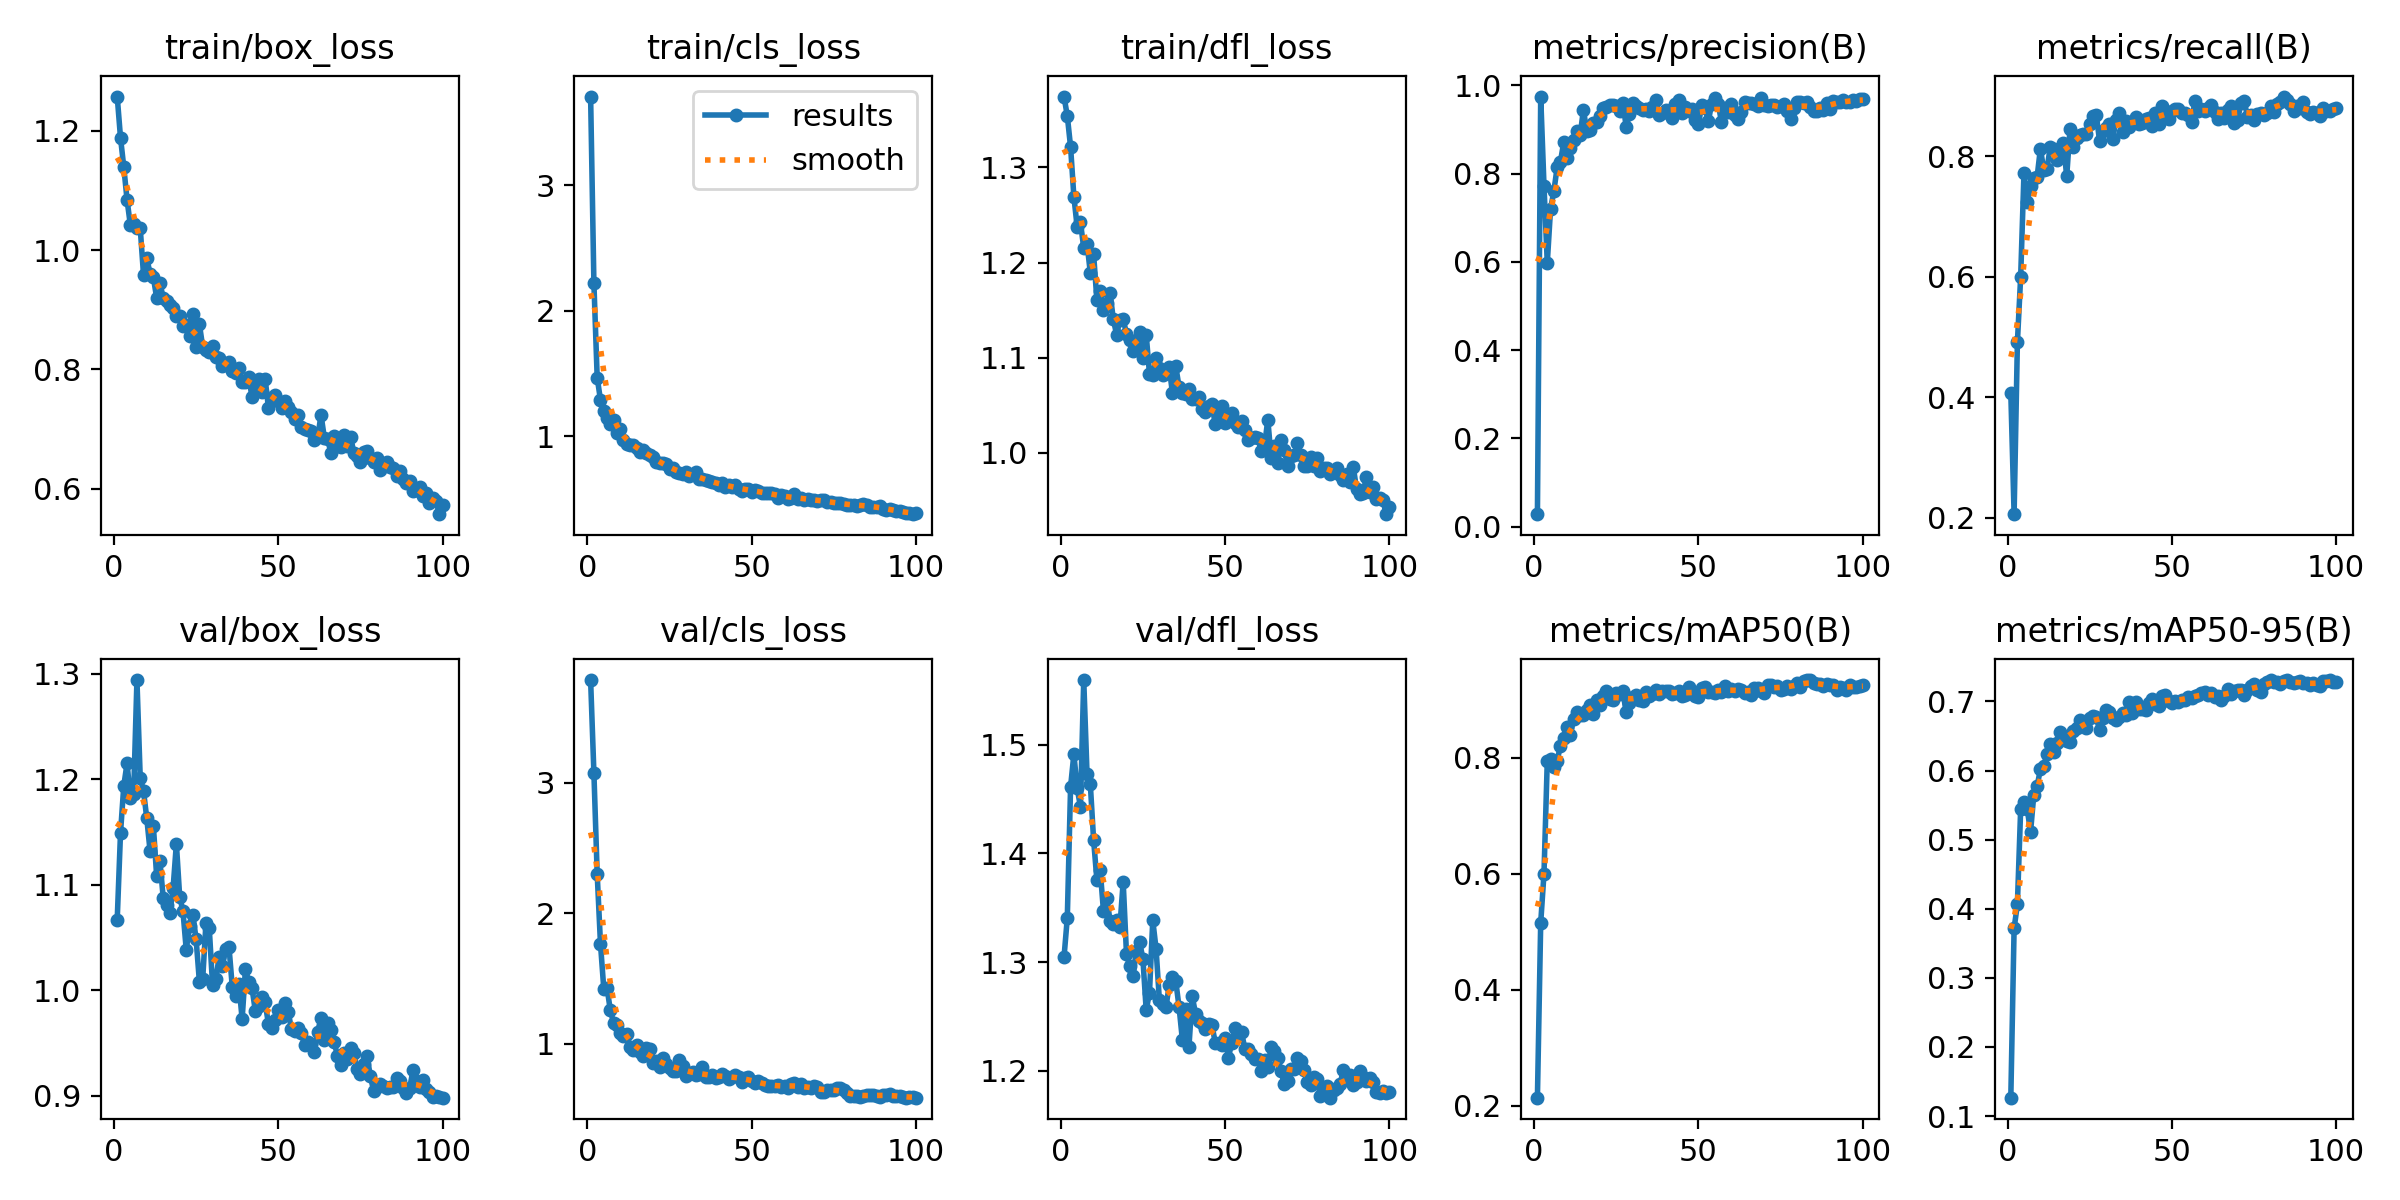

In [25]:
Image(r"/content/runs/detect/train/results.png",width = 800)

In [26]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/safety-1/data.yaml"


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1472.6±423.8 MB/s, size: 50.1 KB)
val: Scanning /content/safety-1/valid/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 120/120 1.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.9it/s 2.8s
                   all        120        577      0.967      0.876      0.925       0.73
                 Boots         90        190      0.965      0.842       0.88      0.656
                Helmet         89        115      0.988      0.852       0.92       0.67
                Person         96        109      0.936      0.936      0.946      0.857
                  Vest        111        163      0.979      0.875      0.952      0.739
Speed: 2.7ms preprocess, 6.6ms inference, 0.1ms 

In [45]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/0.jpg" save=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/0.jpg: 448x640 3 Helmets, 3 Persons, 3 Vests, 49.4ms
Speed: 3.7ms preprocess, 49.4ms inference, 124.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Step 6: Display Prediction Results
After running inference, YOLOv11 saves the prediction images (with bounding boxes) in the runs/detect/predict/ folder.

In this step, we:

Find the latest prediction folder
Load the top few .jpg prediction images
Display them inline to visualize the results

In [41]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob("/content/runs/detect/predict/"), key=os.path.getmtime)
for img in glob.glob("f{latest_folder}/*.jpg")[1:4]:
  display(IPyImage(filename=img, width=600))
  print("/n")

#Step 7: Run Inference using YOLOv11 Model
In this step, we use the trained YOLOv11 model (best.pt) to detect objects on a test image (0.jpg).
The command sets a confidence threshold of 0.25, and saves the output with detected bounding boxes.

Model: /content/runs/detect/train/weights/best.pt (YOLOv11 trained weights)
Image Source: /content/0.jpg
Confidence Threshold: 0.25
Output Folder: Automatically saved in runs/detect/predict/
Visualize YOLOv11 Prediction Output

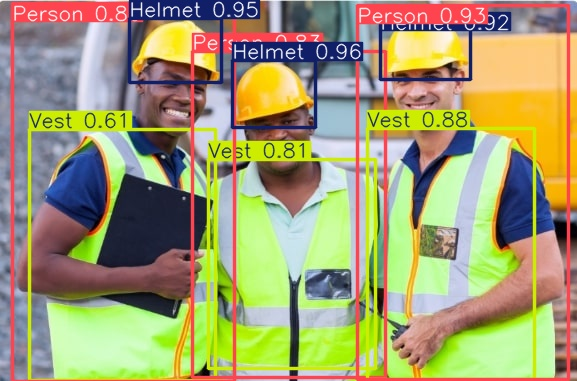

In [46]:
Image("/content/runs/detect/predict8/0.jpg", width=600)

#Step 7 (Alternate): Run Inference on a Video using YOLOv11
In this step, we use the trained YOLOv11 model to perform object detection on a video file (videoplayback.avi).
The prediction results (bounding boxes and labels) will be rendered frame by frame and saved as a new video in the runs/detect/predict/ directory.

Model: /content/runs/detect/train/weights/best.pt
Video Source: /content/videoplayback.avi
Confidence Threshold: 0.25
Output: Annotated video saved automatically

In [50]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" source="/content/ppe-2.avi" conf=0.25 save=True


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 46.9ms
video 1/1 (frame 2/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 11.5ms
video 1/1 (frame 3/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 9.2ms
video 1/1 (frame 4/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 9.0ms
video 1/1 (frame 5/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 9.7ms
video 1/1 (frame 6/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 8.2ms
video 1/1 (frame 7/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 10.1ms
video 1/1 (frame 8/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 10.8ms
video 1/1 (frame 9/206) /content/ppe-2.avi: 384x640 2 Helmets, 2 Persons, 1 Vest, 8.9ms
video 1/1 (frame 10/206) /content/ppe

#Step 8: Compress and Display YOLOv11 Inference Video
After running inference on a video file, YOLOv11 saves the output in .avi format, which may not play smoothly in web interfaces like Jupyter/Colab.

In this step, we:

Convert the .avi output video to .mp4 format using FFmpeg for better compatibility
Encode the .mp4 as Base64
Embed and display the video directly within the notebook using HTML
This provides a smooth, inline preview of detection results on the full video

In [52]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path = "/content/runs/detect/predict10/ppe-2.avi"

compress_path = "/content/ppe-2.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compress_path}")

mp4 = open(compress_path, "rb").read()

data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

#Step 9: Zip and Download YOLOv11 Results Folder via Streamlit
To simplify access to the detection results (images, videos, logs, etc.), we provide an option to zip the entire /runs folder and enable users to download it directly from the Streamlit app.

This step includes:

Recursively zipping the contents of the /runs directory (which contains training and prediction outputs)
Displaying a download button in the Streamlit UI for users to get the zipped file
Click the "📦 Download Results Folder" button to save your detection results locally.

In [53]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.4 MB/s eta 0:00:00


In [54]:
import streamlit as st
import zipfile
import os
from io import BytesIO

def zip_folder(folder_path):
    """Zips the contents of a folder and returns it as a BytesIO object"""
    zip_buffer = BytesIO()
    with zipfile.ZipFile(zip_buffer, "w", zipfile.ZIP_DEFLATED) as zip_file:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zip_file.write(file_path, arcname)
    zip_buffer.seek(0)
    return zip_buffer

# Example usage
folder_to_zip = "/content/runs"  # Replace with your folder path

if os.path.exists(folder_to_zip):
    zipped_folder = zip_folder(folder_to_zip)

    st.download_button(
        label="📦 Download Results Folder",
        data=zipped_folder,
        file_name="runs.zip",
        mime="application/zip"
    )
else:
    st.warning(f"Folder '{folder_to_zip}' not found.")

2025-09-26 18:28:30.869 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 18:28:30.870 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 18:28:30.871 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 18:28:30.872 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 18:28:30.873 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 18:28:30.935 
  command:

    stre

#Step 10 (Alternate): Zip and Download Results Folder in Google Colab
If you're working in Google Colab, you can use this method to download the entire /runs directory, which contains all YOLOv11 outputs (e.g., training logs, prediction images, videos).

This step does the following:

Zips the entire /content/runs folder
Generates a runs.zip file in /content
Automatically triggers a download prompt to save the file locally
This provides a quick and convenient way to retrieve all output files from Colab

In [55]:
import shutil
from google.colab import files

# Path to the folder you want to zip
folder_path = "/content/runs"
zip_path = "/content/runs.zip"

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

# Download the zipped file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Step 11: Zip a Folder Programmatically (Local/Colab)
This utility function allows you to programmatically zip any folder using Python’s built-in zipfile module.
In this example, we zip the folder named safety-1 and create a compressed archive safety-1.zip.

This is useful for:

Packaging datasets or model outputs
Archiving files for sharing or backup
Preparing folders for upload or download
After running this code, the zip file will be created in the current working directory.

In [56]:
import zipfile
import os

def zip_folder(folder_path, output_filename):
    with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)
    print(f"Folder '{folder_path}' zipped as '{output_filename}'")

# Example usage
zip_folder('safety-1', 'safety-1.zip')

Folder 'safety-1' zipped as 'safety-1.zip'
